# Penguin Data Set

# Prerequisites

Why our Hello gplearn Video of course! Actually you can probaly just start here, but you'll need a python environement like Conda and **gplearn** installed.

In [1]:
import pandas as pd
link = "https://github.com/lmassaron/datasets/"
link += "releases/download/1.0/penguins.feather"
penguins = pd.read_feather(link)

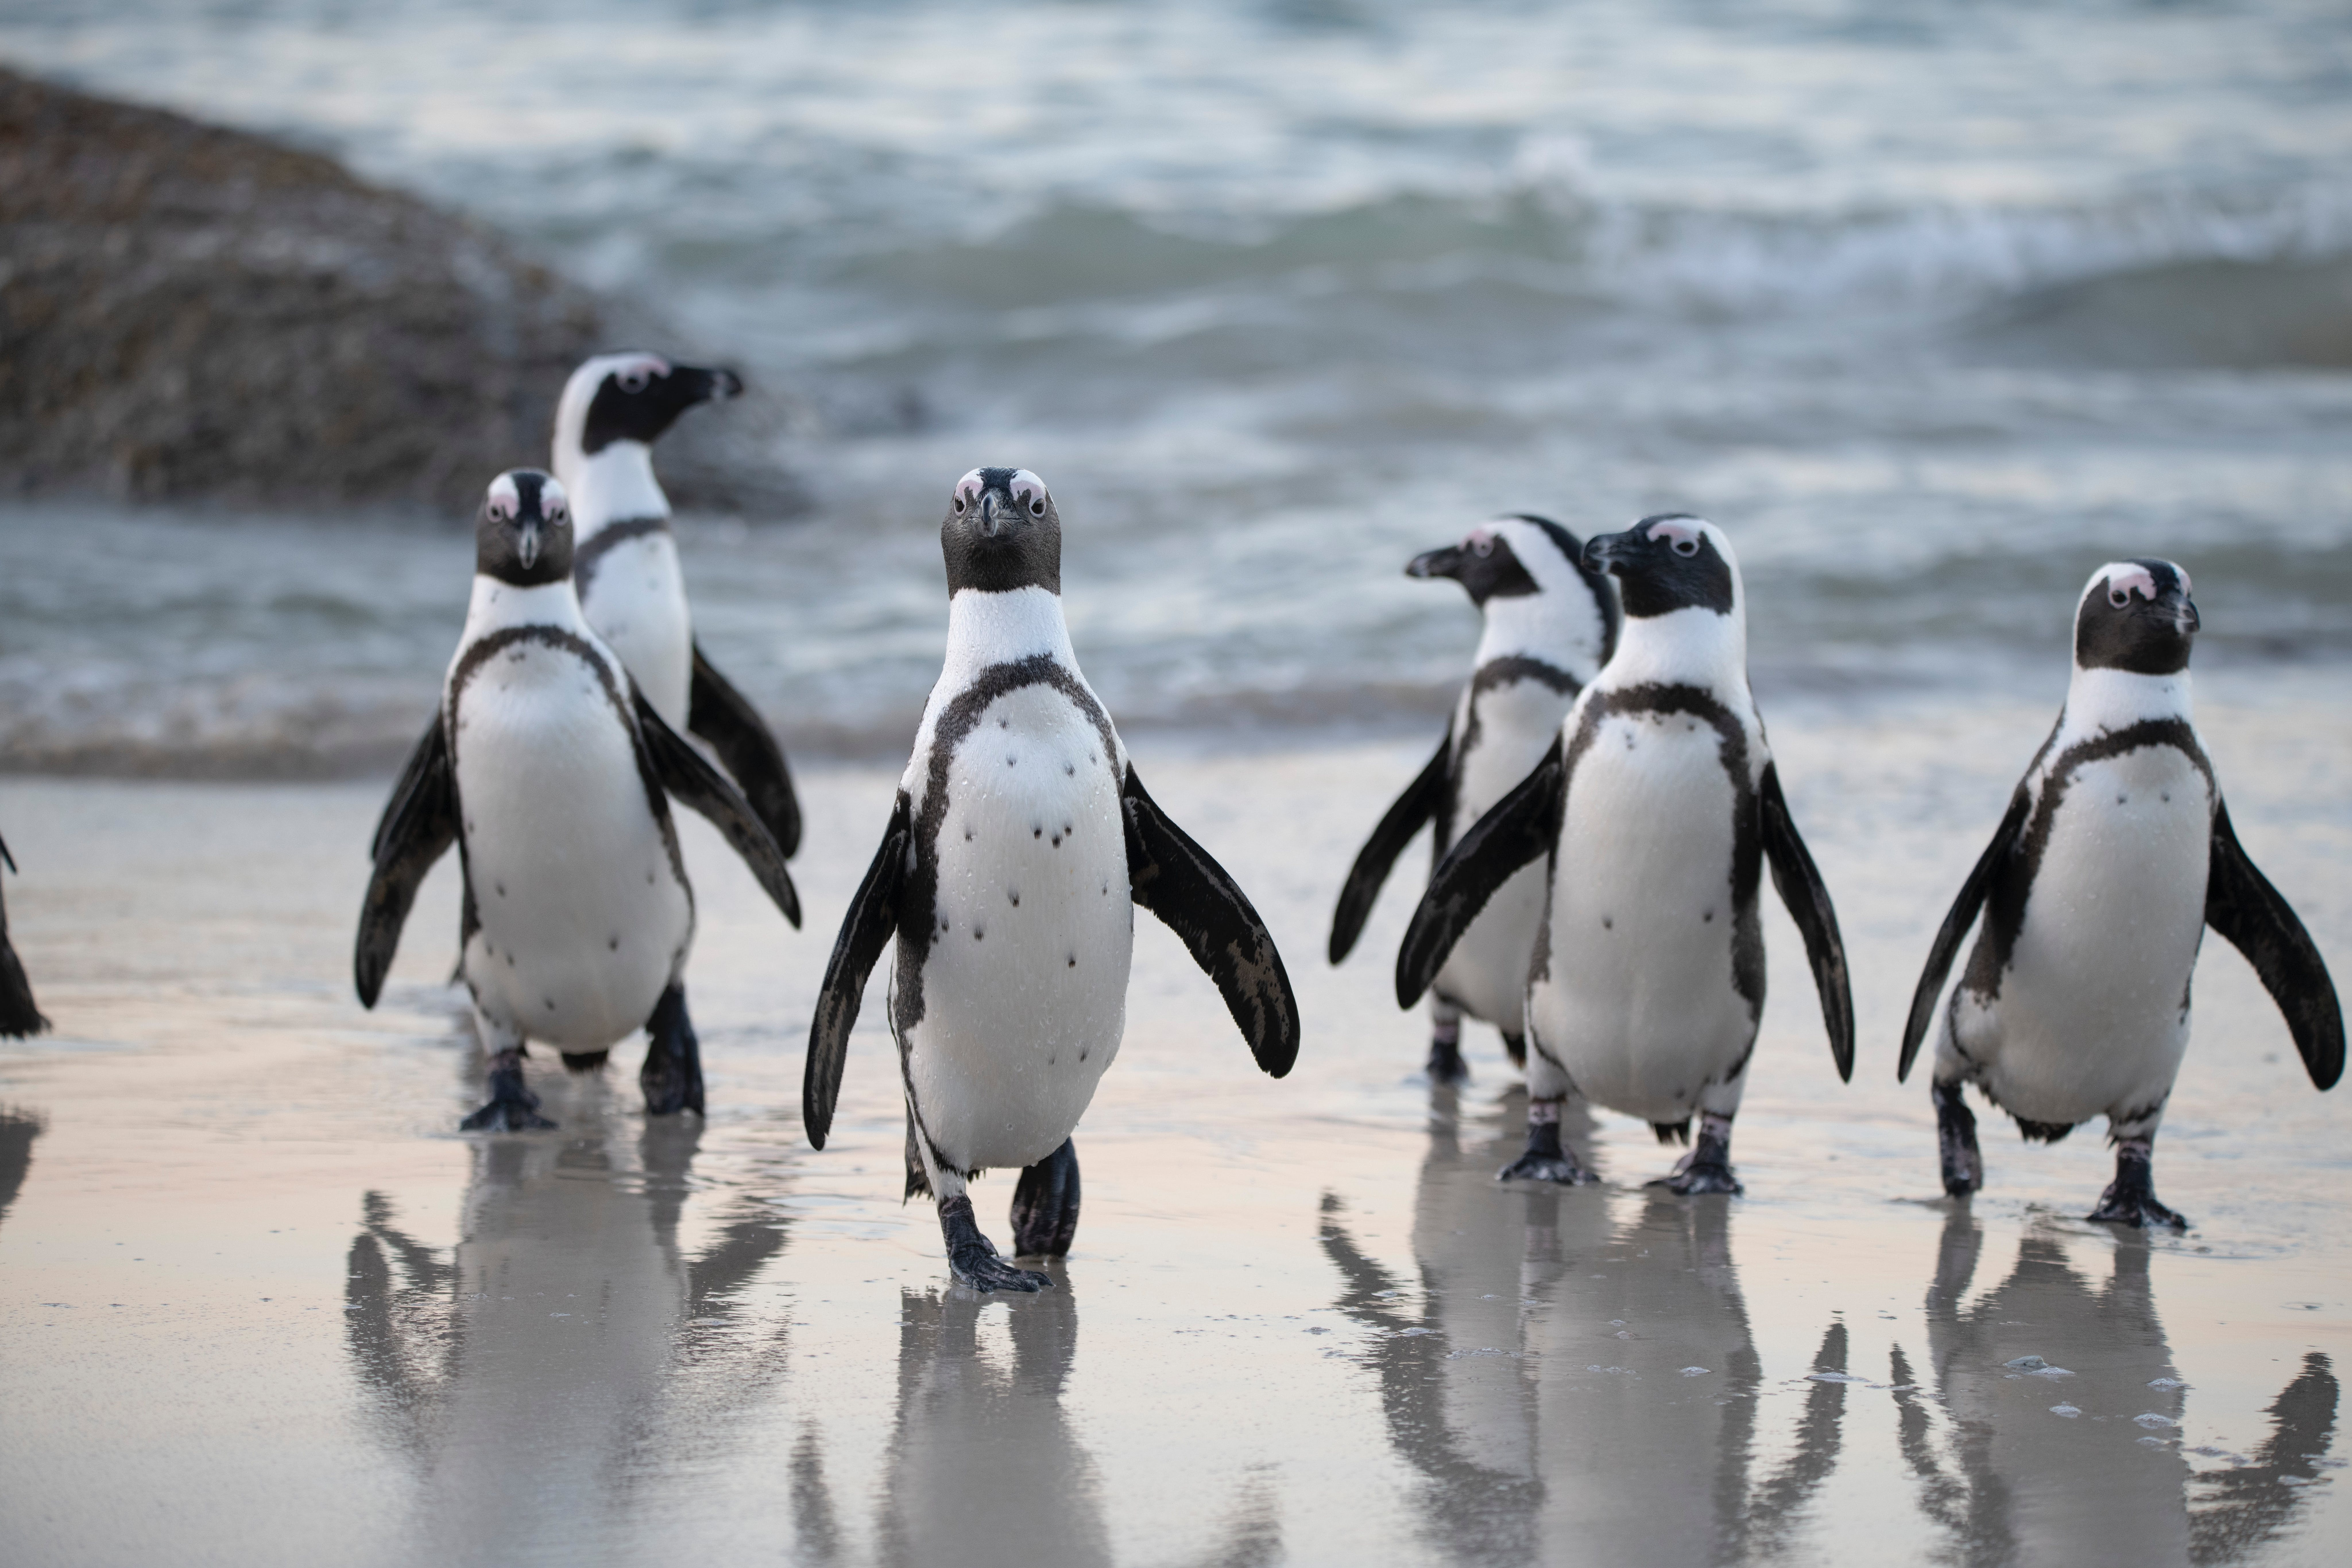

In [2]:
#Photo by David Dibert: https://www.pexels.com/photo/flock-of-penguins-near-sea-1299391/
from IPython.display import Image

# Display an image file
Image(filename = "pexels-david-dibert-1299391.jpg", width = 600)  



Gender, body mass, the flipper length and the bill length and depth (called culmen) of three species of penguins (Adelie, Chinstrap, Gentoo, for more information please consult the article: http://marinebio.net/marinescience/04benthon/AApenguins.htm) (From https://github.com/lmassaron/datasets/)

In [3]:
penguins.head()

species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie              39.1             18.7              181.0       3750.0   
1  Adelie              39.5             17.4              186.0       3800.0   
2  Adelie              40.3             18.0              195.0       3250.0   
3  Adelie              36.7             19.3              193.0       3450.0   
4  Adelie              39.3             20.6              190.0       3650.0   

      sex  
0    MALE  
1  FEMALE  
2  FEMALE  
3  FEMALE  
4    MALE

# Categorizing Using GP (Genetic Programming)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from gplearn.genetic import SymbolicClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import numpy as np
import graphviz
from sklearn.metrics import roc_auc_score


In [5]:
#We'll be doing binary categorization so let's just focus on the two most common types of penguins in
#the dataset

# Step 1: Count the occurrences of each species
species_counts = penguins['species'].value_counts()

# Step 2: Identify the species with the least occurrences
least_frequent_species = species_counts.idxmin()

# Step 3: Filter out rows with that species
penguins = penguins[penguins['species'] != least_frequent_species]

In [6]:
#First let's divide up the dataset into features and species category
features = penguins[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].values.tolist()
categories = penguins['species']


In [7]:
#Now we split it up into testing and training data
X = StandardScaler().fit_transform(features)
y, series_strings = categories.factorize()

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

In [8]:
#Let's classify our penguins!

clf = SymbolicClassifier(random_state=0, verbose=1) #CLASSIFIER
clf.fit(X_train, y_train) #CLASSIFYING
score = clf.score(X_test, y_test)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.53          2.48947       23       0.00843338              N/A      5.85s
   1    10.86         0.775132       23       0.00173604              N/A      3.99s
   2    11.88         0.637111       19       9.8441e-08              N/A      3.77s
   3    13.87          1.59294       21      9.99201e-16              N/A      3.66s
   4    10.56          1.81101       21      9.99201e-16              N/A      3.40s
   5     5.87          1.34791       11      9.99201e-16              N/A      3.22s
   6     5.04          1.08439        7      9.99201e-16              N/A      2.86s
   7     5.06          1.36217        7      9.99201e-16              N/A      2.65s
   8     4.99          1.00427        7      9.99201e-16              N/A  

In [27]:
y_score = clf.predict_proba(X_test)

# Extract the probabilities for the positive class
# Assuming it is the second column (index 1) in y_score
y_score_pos_class = y_score[:, 1]

# Now calculate ROC AUC score using these probabilities
roc_auc_score(y_test, y_score_pos_class)


1.0

Our result: div(div(sub(X3, X1), 0.087), 0.087)



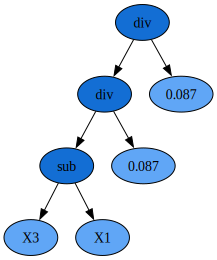

In [31]:
print ("Our result:",clf._program)
print('')
dot_data = clf._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex4_tree', format='png', cleanup=True)
graph

## What does this mean?

Let's walk through an example:

First we start at the bottom, what are X3 and X1? They are our 1st and 3rd features (Culmen length and flipper length) Only the numbers have been standardized.

Let's look at two penguins in our dataset, we'll name them 'Chilly' and 'Willy' (Super original I know)


In [58]:
#Our two penguins' stats
print ("Penguin 1 'Chilly'-> culmen length:",penguins.loc[0]['culmen_length_mm'],"flipper length:",penguins.loc[0]['flipper_length_mm'])
print ("Penguin 2 'Willy'-> culmen length:",penguins.loc[329]['culmen_length_mm'],"flipper length:",penguins.loc[329]['flipper_length_mm'])
print ('')

Penguin 1 'Chilly'-> culmen length: 39.1 flipper length: 181.0
Penguin 2 'Willy'-> culmen length: 46.8 flipper length: 215.0



Now we standardize the amounts to work better with our classifier. Here's Chilly and Willy's stats standardized (Numbers are scaled to the zone -1 to 1)

In [57]:
#Standarized Stats - X1 and X3
row_number = penguins.index.get_loc(329)
print ("Penguin 1 'Chilly'-> culmen length:",X[0][0],"flipper length:",X[0][2])
print ("Penguin 2 'Willy'-> culmen length:",X[row_number][0],"flipper length:",X[row_number][0])
print ('')

Penguin 1 'Chilly'-> culmen length: -0.7013636152158962 flipper length: -1.4200104381738001
Penguin 2 'Willy'-> culmen length: 0.7779959639116957 flipper length: 0.7779959639116957



Now lets run those penguins through our formula. Our first step is to subtract X1 from X3:

In [81]:
Penguin_1_x1 = X[0][0] #We computed the scaled functions earlier and set it to X
Penguin_1_x3 = X[0][2] 
Penguin_2_x1 = X[row_number][0] #row_number is the loc of penguin 2 in the dataframe
Penguin_2_x3 = X[row_number][2] #We computed the scaled functions earlier and set it to X

P1_X3_minus_X1 = Penguin_1_x3 - Penguin_1_x1 
P2_X3_minus_X1 = Penguin_2_x3 - Penguin_2_x1 



We take these numbers and divide by 0.87

In [82]:
P1_div_87 = P1_X3_minus_X1 / 0.87
P2_div_87 = P2_X3_minus_X1 / 0.87


And according to our graph our final step is another division:

In [83]:
P1_div_87_2 = P1_div_87 / 0.87
P2_div_87_2 = P2_div_87 / 0.87


Great there it is!

In [84]:
print (P1_div_87_2,P2_div_87_2)

-0.9494607252713754 0.0925925575660984


Wait, what does that even mean? We've got two numbers for our peguins. But we still need the sigmoid function! ( More on sigmoids at https://www.youtube.com/watch?v=TPqr8t919YM )

In [85]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print (sigmoid(P1_div_87_2),sigmoid(P2_div_87_2))

0.27899328741233853 0.5231316154051049


This tells us the probability the penguin belongs to Gentoos? Why?
This goes back to this line:
`y, series_strings = categories.factorize()`.
It factorizes our two categories, Adelie penguins are 0's and Gentoos are 1's. The Sigmoid gives the probability of being a 1 or in our case a Gentoo.

So Chilly should be a Adelie (29% chance of being a Gentoo) with his result. Let's check and see if we were correct:


In [87]:
penguins.loc[0]['species']

'Adelie'

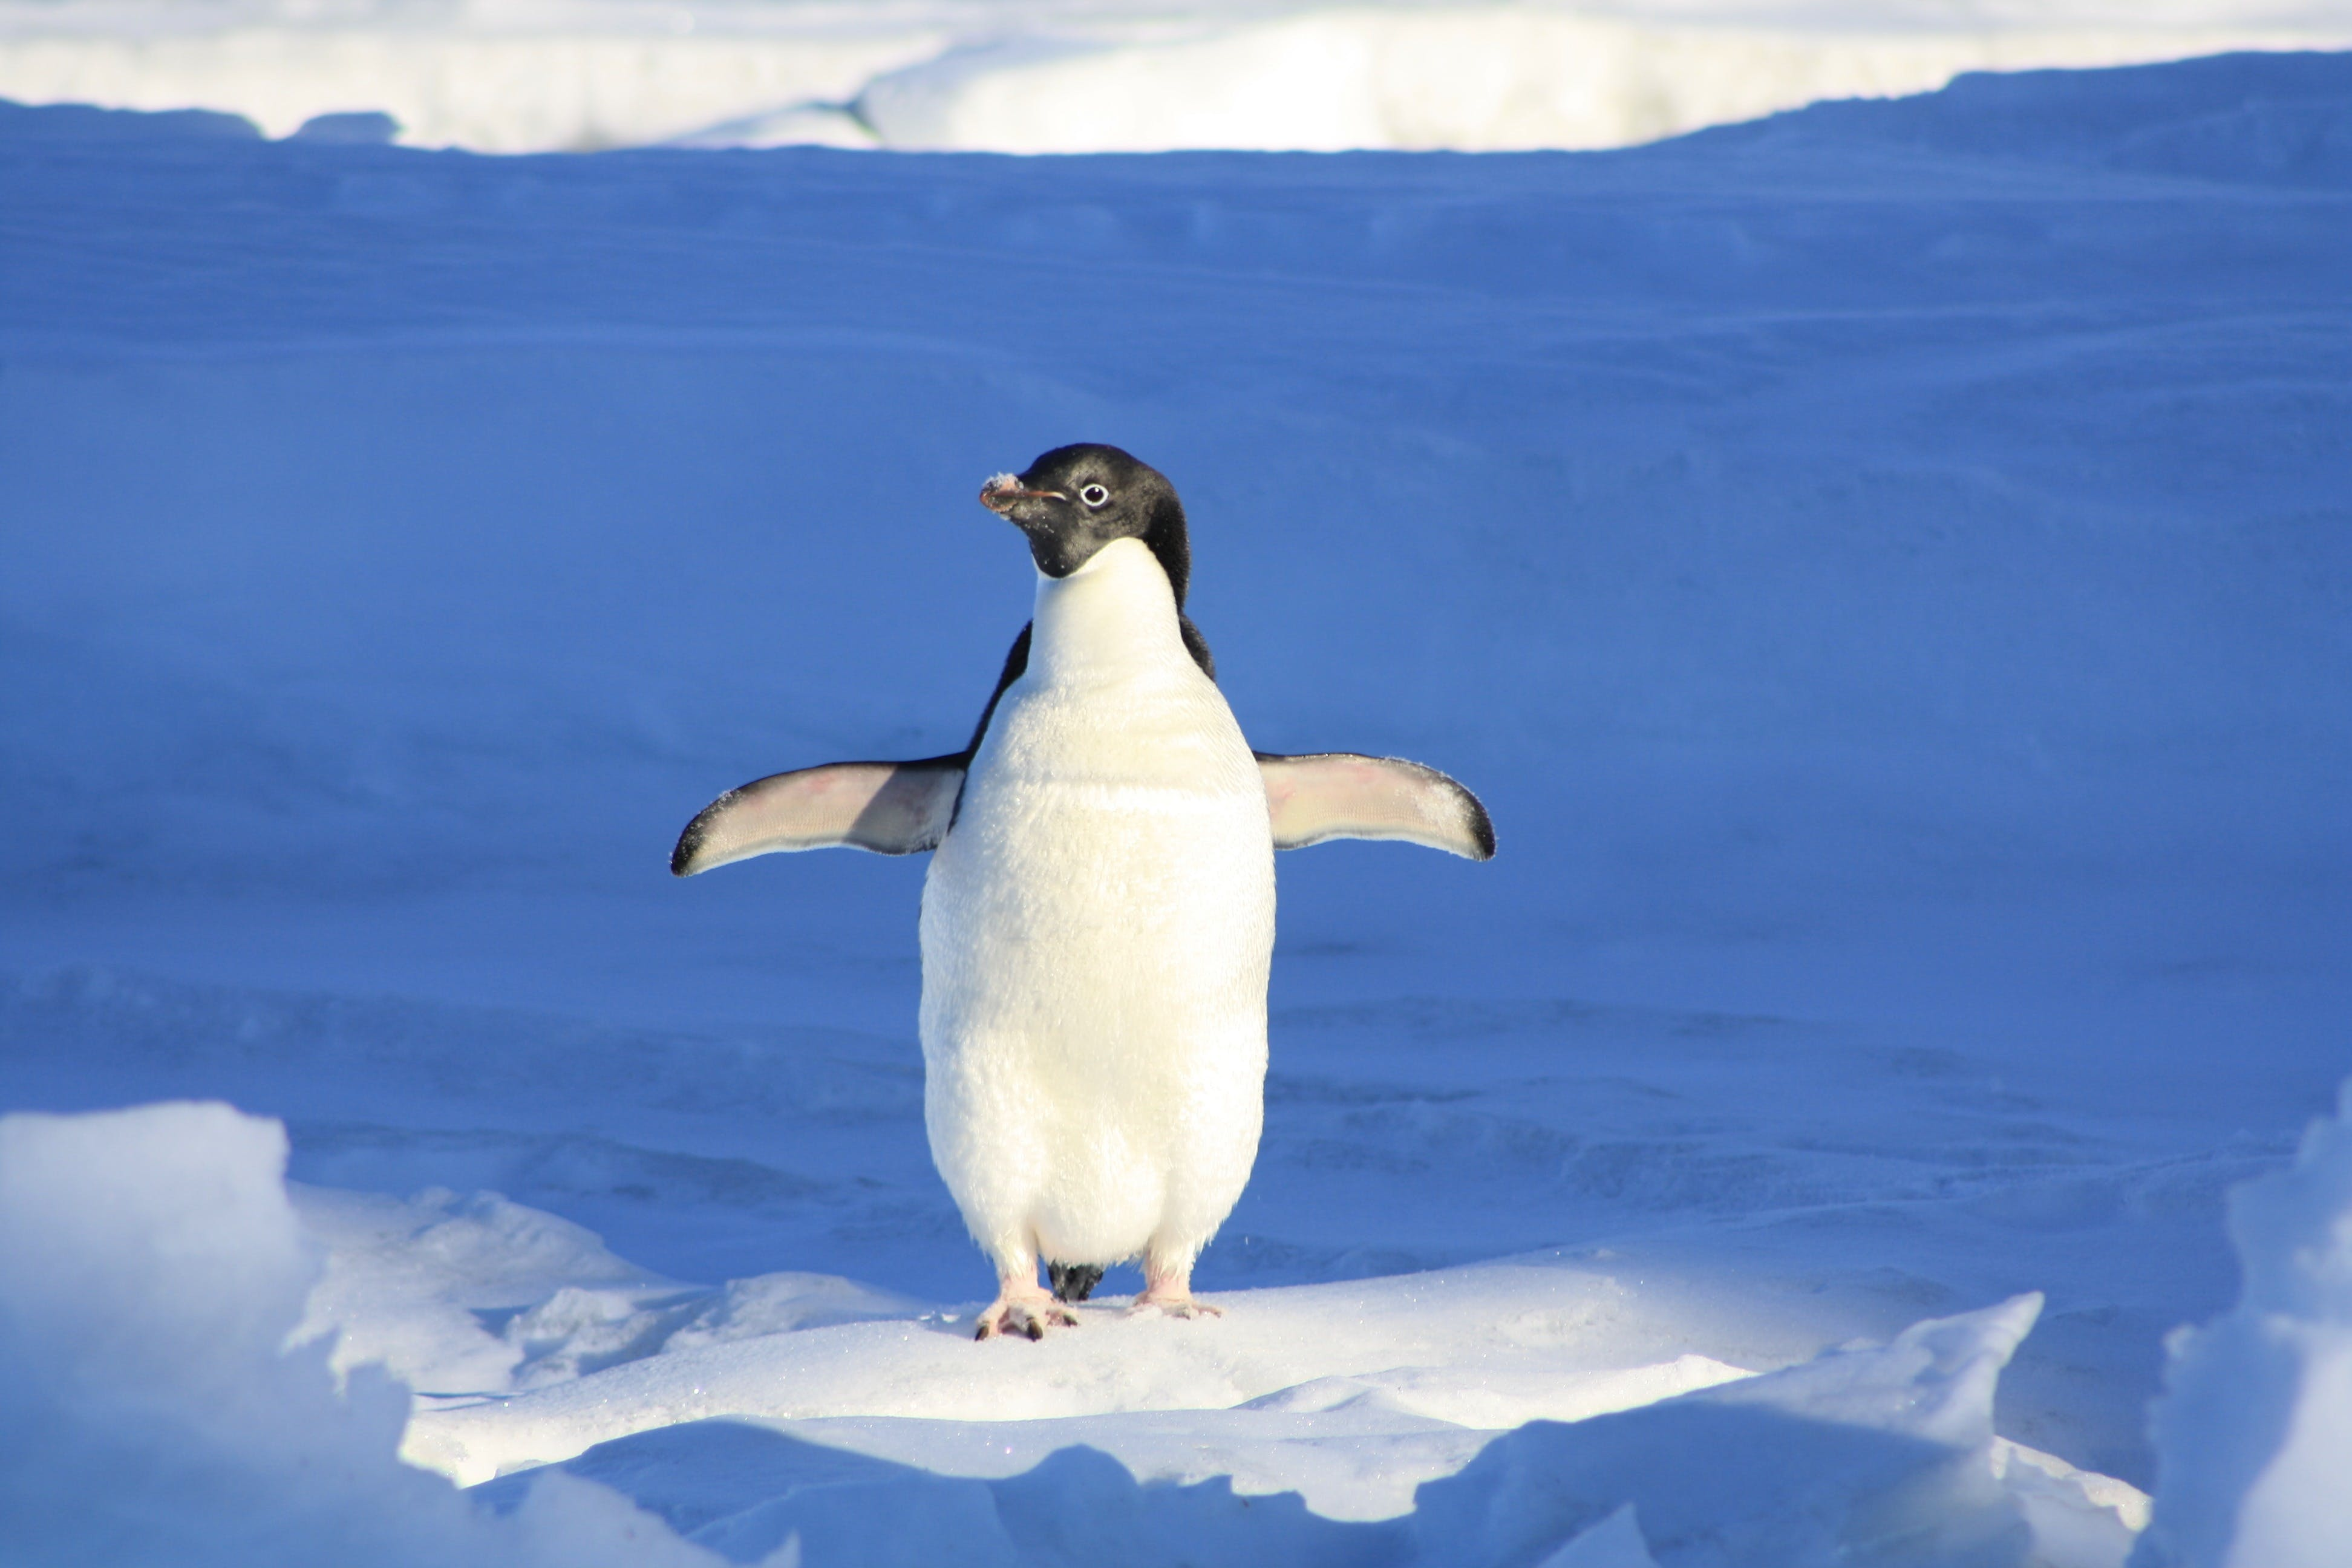

In [90]:
# "Chilly" - Photo by Pixabay: https://www.pexels.com/photo/close-up-photography-of-penguin-on-snow-86405/
Image(filename = "pexels-pixabay-86405.jpg", width = 500)  


In [88]:
penguins.loc[329]['species']

'Gentoo'

And Willy should be a Gentoo (52% chance of being a Gentoo) ...

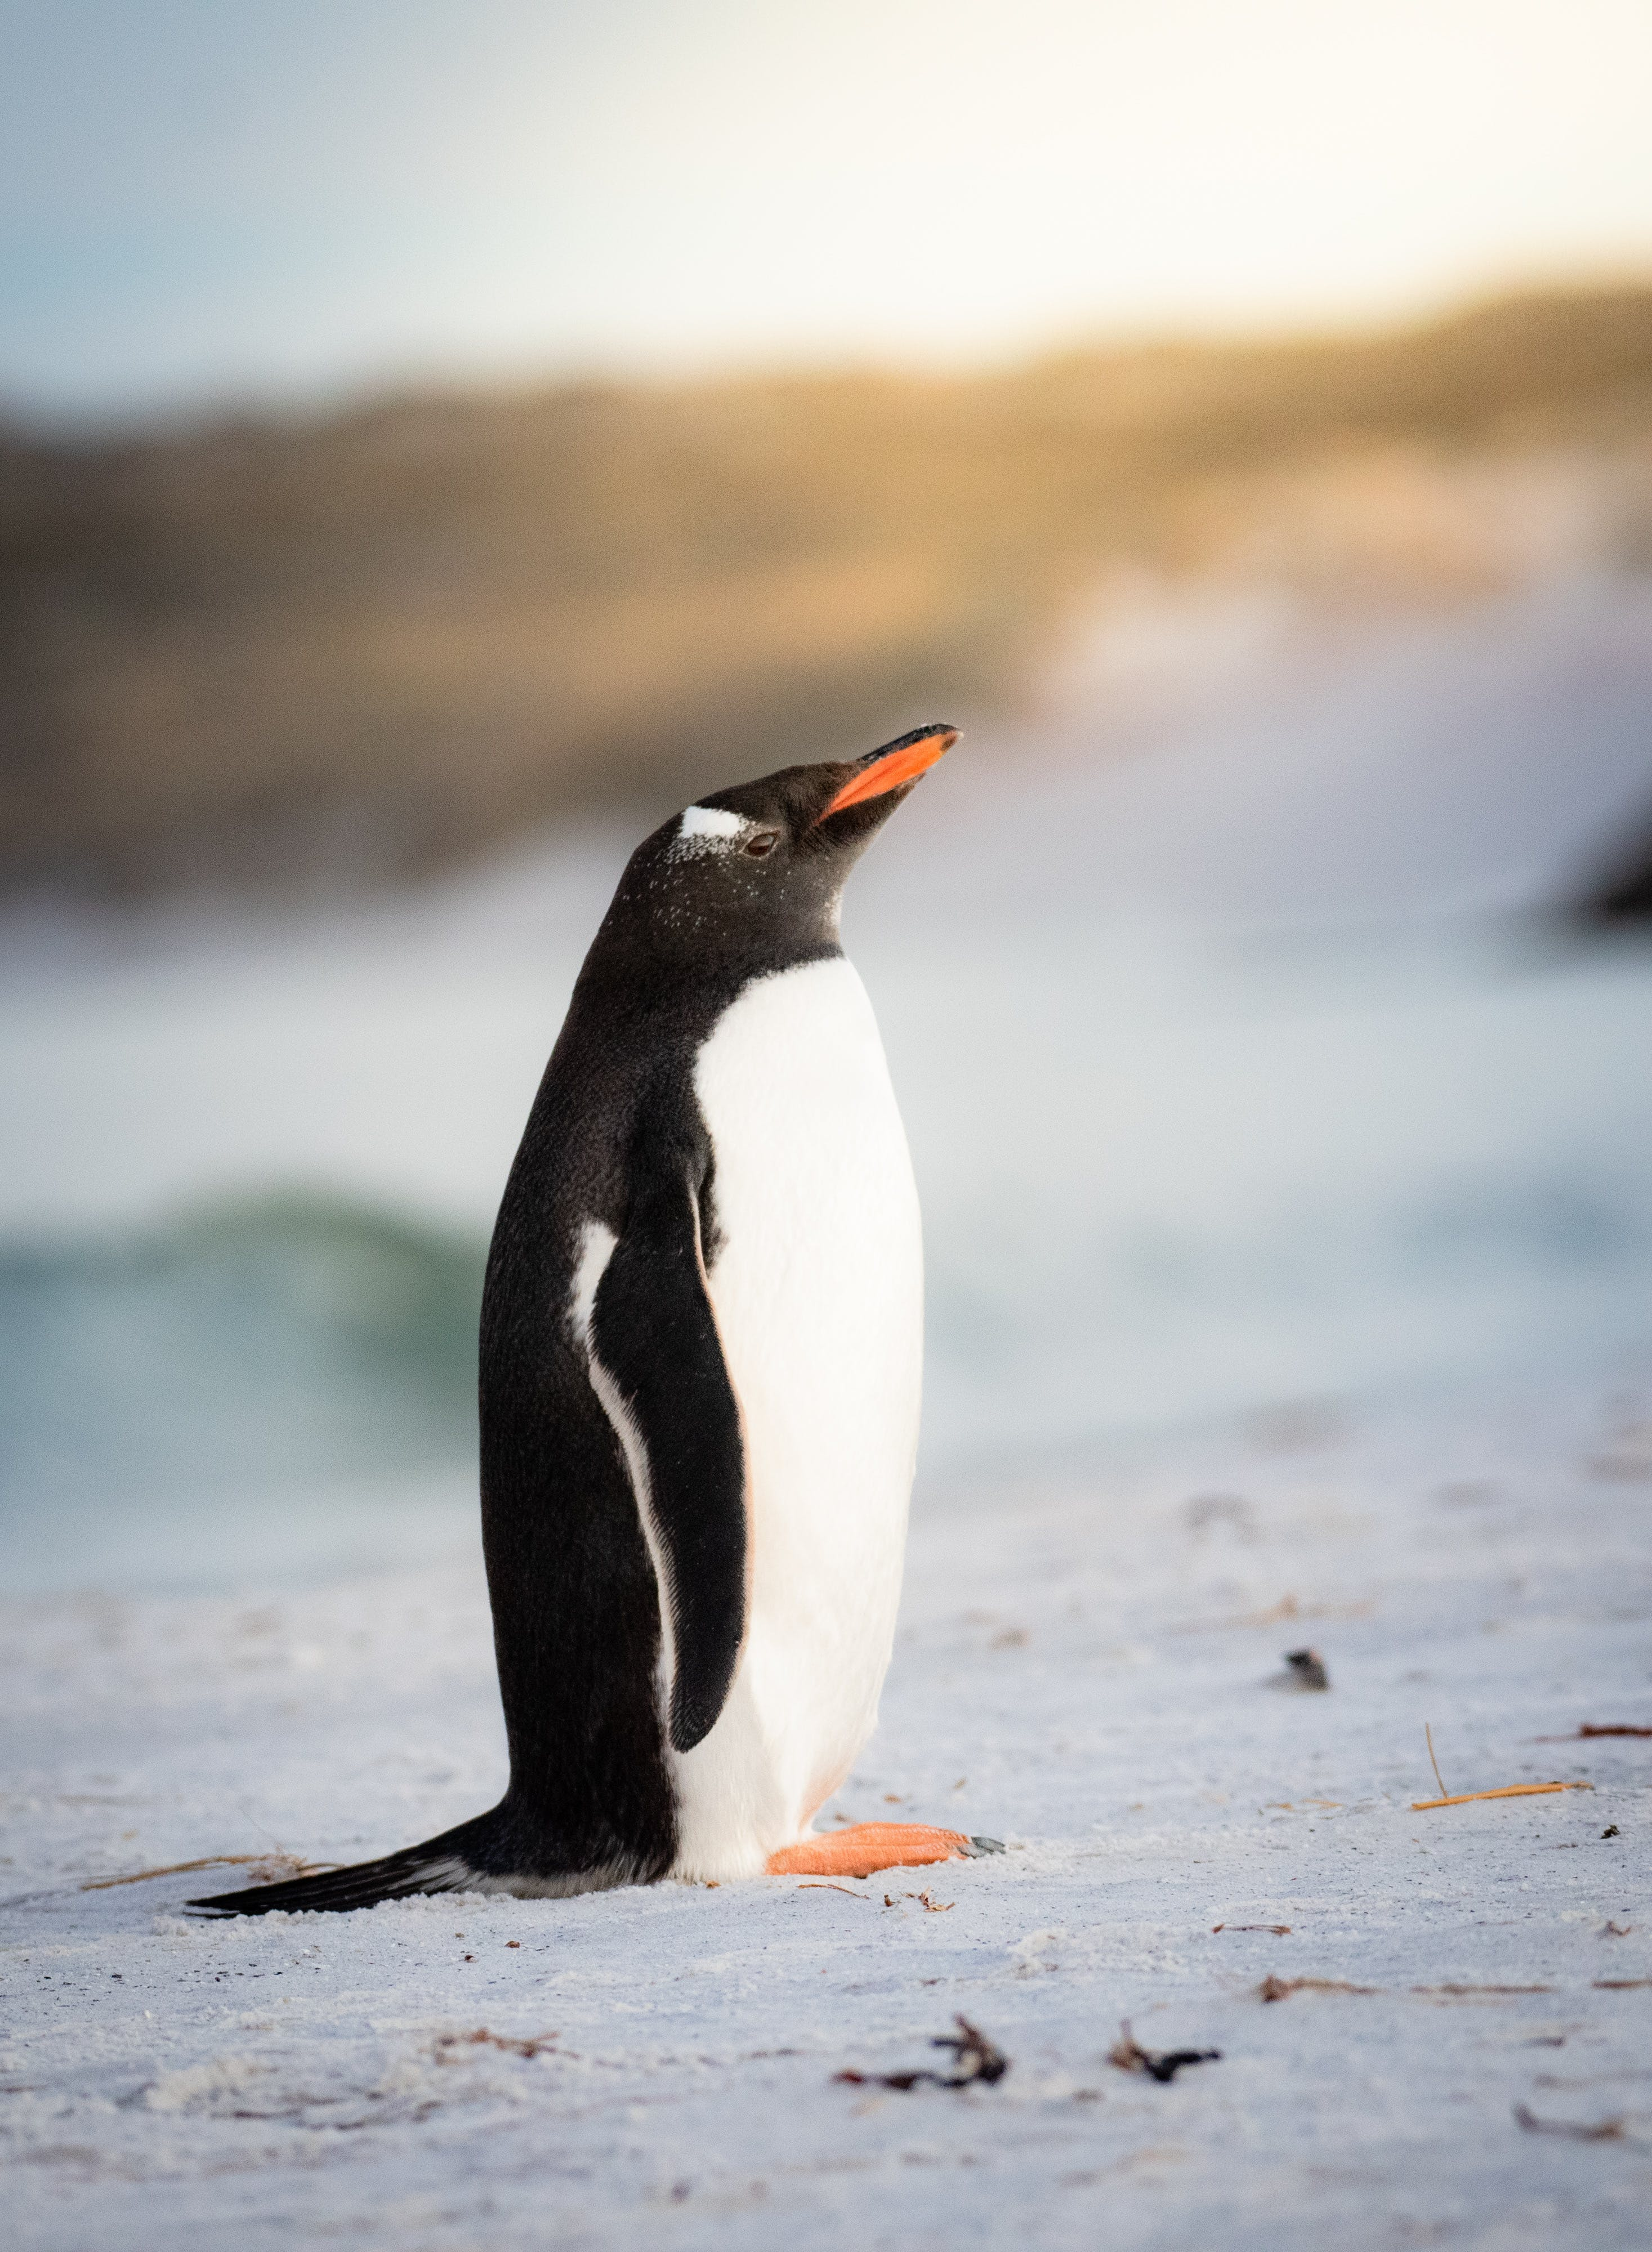

In [91]:
# "Willy" - Photo by Klajdi Cena: https://www.pexels.com/photo/a-close-up-shot-of-a-gentoo-penguin-14223820/

Image(filename = "pexels-klajdi-cena-14223820.jpg", width = 500)  
